In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Spotify_history.csv', encoding='latin-1')
df

,spotify_track_uri,Timestamp,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,08-07-13 2:44,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,08-07-13 2:45,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,08-07-13 2:50,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,08-07-13 2:52,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,08-07-13 3:17,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,15-12-24 23:06,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,15-12-24 23:06,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,15-12-24 23:06,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,15-12-24 23:06,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [ ]:
df.shape

(149860, 11)

In [ ]:
df.ndim

2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   Timestamp          149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [ ]:
df.isna().sum()/len(df)

,0
spotify_track_uri,0.000000
Timestamp,0.000000
platform,0.000000
ms_played,0.000000
track_name,0.000000
artist_name,0.000000
album_name,0.000000
reason_start,0.000954
reason_end,0.000781
shuffle,0.000000


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['reason_start'].isna().sum()
df.dropna(subset=['reason_start'], inplace=True)

In [ ]:
df['reason_end'].isna().sum()
df.dropna(subset=['reason_end'], inplace=True)

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['date'] = df['Timestamp'].dt.date
df['time'] = df['Timestamp'].dt.time

<ipython-input-277-a763414cc9b0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [ ]:
df.describe()

,Timestamp,ms_played
count,147866,1.478660e+05
mean,2020-04-14 03:09:01.655147264,1.282222e+05
min,2013-02-08 20:29:00,0.000000e+00
25%,2018-01-31 23:46:30,2.813000e+03
50%,2020-06-22 17:35:00,1.386325e+05
75%,2022-01-02 01:30:00,2.184000e+05
max,2024-12-15 23:06:00,1.561125e+06
std,NaN,1.177831e+05


In [ ]:
df.rename(columns={'spotify_track_uri':'URL'}, inplace=True)

In [ ]:
df.columns

Index(['URL', 'Timestamp', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped', 'date', 'time'],
      dtype='object')

In [ ]:
df.drop('URL', axis=1, inplace=True)

In [ ]:
new_column_order = ['Timestamp', 'date', 'time','artist_name','track_name','album_name', 'ms_played','platform','shuffle','skipped','reason_start','reason_end']
df = df[new_column_order]
df


,Timestamp,date,time,artist_name,track_name,album_name,ms_played,platform,shuffle,skipped,reason_start,reason_end
0,2013-08-07 02:44:00,2013-08-07,02:44:00,The Mowgli's,"Say It, Just Say It",Waiting For The Dawn,3185,web player,False,False,autoplay,clickrow
1,2013-08-07 02:45:00,2013-08-07,02:45:00,Calvin Harris,Drinking from the Bottle (feat. Tinie Tempah),18 Months,61865,web player,False,False,clickrow,clickrow
2,2013-08-07 02:50:00,2013-08-07,02:50:00,Lana Del Rey,Born To Die,Born To Die - The Paradise Edition,285386,web player,False,False,clickrow,unknown
3,2013-08-07 02:52:00,2013-08-07,02:52:00,Lana Del Rey,Off To The Races,Born To Die - The Paradise Edition,134022,web player,False,False,trackdone,clickrow
4,2013-08-07 03:17:00,2013-08-07,03:17:00,Empire Of The Sun,Half Mast,Walking On A Dream,0,web player,False,False,clickrow,nextbtn
...,...,...,...,...,...,...,...,...,...,...,...,...
149855,2024-12-15 23:06:00,2024-12-15,23:06:00,John Mayer,On The Way Home,Paradise Valley,1247,android,True,True,fwdbtn,fwdbtn
149856,2024-12-15 23:06:00,2024-12-15,23:06:00,The Beatles,Magical Mystery Tour - Remastered 2009,Magical Mystery Tour,1515,android,True,True,fwdbtn,fwdbtn
149857,2024-12-15 23:06:00,2024-12-15,23:06:00,John Mayer,"Stop This Train - Live at the Nokia Theatre, L...",Where the Light Is: John Mayer Live In Los Ang...,1283,android,True,True,fwdbtn,fwdbtn
149858,2024-12-15 23:06:00,2024-12-15,23:06:00,John Mayer,I Don't Trust Myself (With Loving You),Continuum,1306,android,True,True,fwdbtn,fwdbtn


***1. User Engagement & Listening Behavior***

A). What factors influence song skipping behavior?


<ipython-input-284-d616ea43eaba>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['Timestamp'].dt.hour


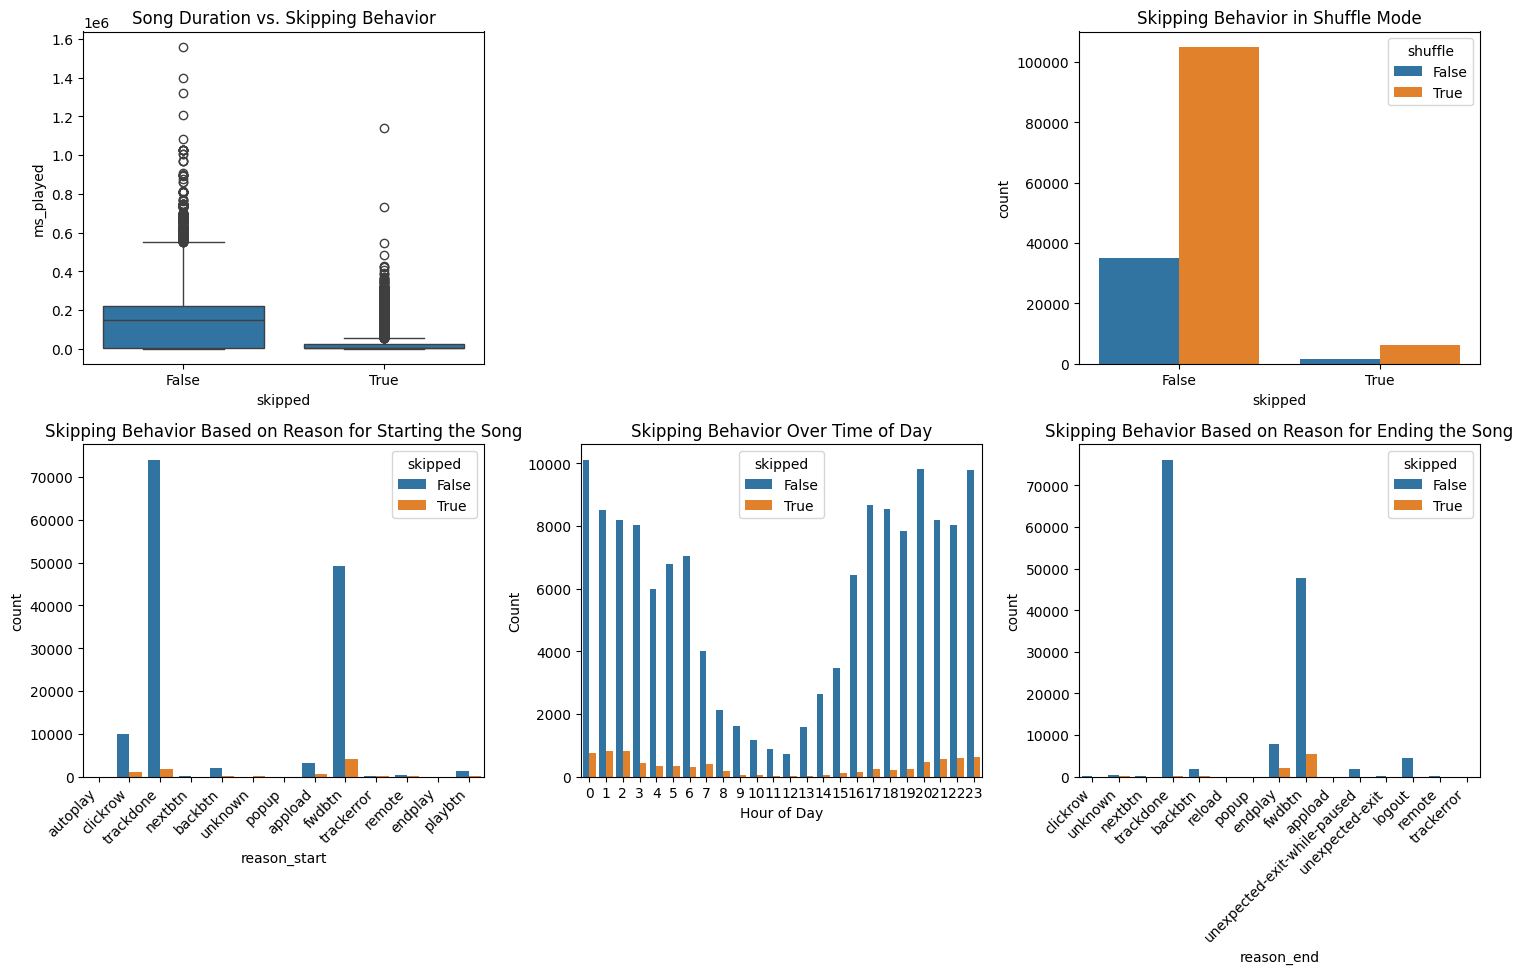

In [ ]:
# 1 The relationship between 'ms_played' and 'skipped'
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
sns.boxplot(x='skipped', y='ms_played', data=df)
plt.title('Song Duration vs. Skipping Behavior')

# 2.Investigation on the impact of 'shuffle' mode
plt.subplot(2,3,3)
sns.countplot(x='skipped', hue='shuffle', data=df)
plt.title('Skipping Behavior in Shuffle Mode')


# 3.To Analyze skipping reasons ('reason_start' and 'reason_end')
plt.subplot(2,3,4)
sns.countplot(x='reason_start', hue='skipped', data=df)
plt.title('Skipping Behavior Based on Reason for Starting the Song')
plt.xticks(rotation=45, ha='right')


plt.subplot(2,3,6)
sns.countplot(x='reason_end', hue='skipped', data=df)
plt.title('Skipping Behavior Based on Reason for Ending the Song')
plt.xticks(rotation=45, ha='right')

#4 To analyze the skipped reasons hourly
plt.subplot(2,3,5)
df['hour'] = df['Timestamp'].dt.hour
sns.countplot(x='hour', hue='skipped', data=df)
plt.title('Skipping Behavior Over Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')


plt.tight_layout()
plt.show()


B). How does shuffle mode impact the way users listen to songs?


<Axes: xlabel='skipped', ylabel='count'>

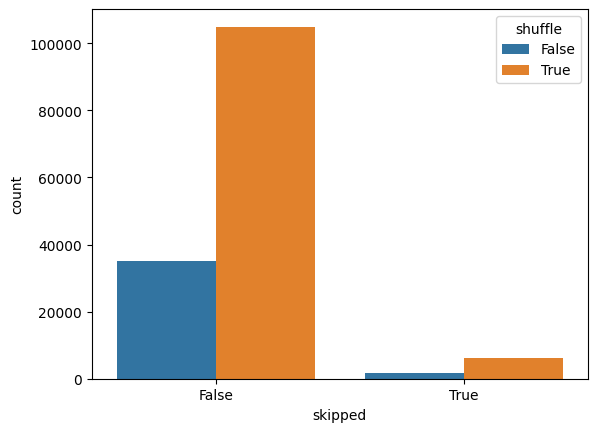

In [ ]:
sns.countplot(x='skipped', hue='shuffle', data=df)

Skip rate with shuffle: 5.56%
Skip rate without shuffle: 4.26%


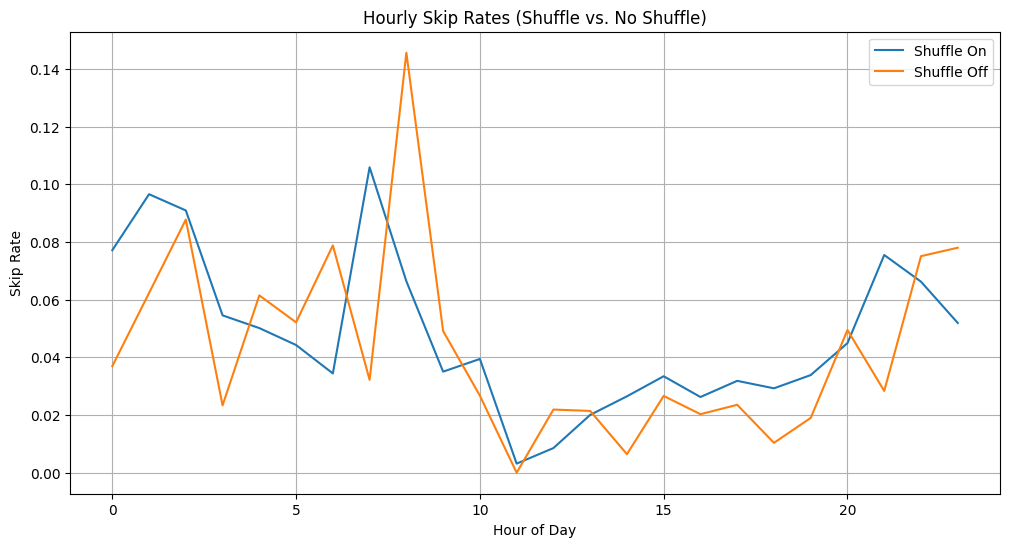


Skip rates by platform:
shuffle            False     True 
platform                          
android         0.045901  0.053908
cast to device  0.000000  0.000000
iOS             0.048303  0.073253
mac             0.054004  0.067293
web player      0.000000       NaN
windows         0.068814  0.189672

Skip rates by reason for starting a song:
shuffle          False     True 
reason_start                    
appload       0.190716  0.136347
autoplay      0.000000       NaN
backbtn       0.146789  0.045816
clickrow      0.086129  0.097700
endplay       0.000000       NaN
fwdbtn        0.102238  0.076265
nextbtn       0.000000       NaN
playbtn       0.051502  0.050664
popup         1.000000       NaN
remote        0.059322  0.057895
trackdone     0.012223  0.027011
trackerror    0.000000  0.145631
unknown       0.590909  0.000000

Skip rates by reason for ending a song:


shuffle,False,True
reason_end,,
appload,1.000000,NaN
backbtn,0.168582,0.092581
clickrow,0.117647,NaN
endplay,0.186462,0.219298
fwdbtn,0.131753,0.099314
logout,0.000000,0.000000
nextbtn,0.000000,NaN
popup,1.000000,NaN
reload,0.000000,NaN


In [ ]:
# 1. Quantifying the Difference (Skip Rate)
skip_rate_shuffle = df[df['shuffle'] == True]['skipped'].mean()
skip_rate_no_shuffle = df[df['shuffle'] == False]['skipped'].mean()

print(f"Skip rate with shuffle: {skip_rate_shuffle:.2%}")
print(f"Skip rate without shuffle: {skip_rate_no_shuffle:.2%}")

# 2. Time of Day Analysis
hourly_skip_rates = df.groupby(['hour', 'shuffle'])['skipped'].mean().unstack()

# Plotting hourly skip rates for both shuffle and no shuffle.
plt.figure(figsize=(12, 6))
plt.plot(hourly_skip_rates.index, hourly_skip_rates[True], label='Shuffle On')
plt.plot(hourly_skip_rates.index, hourly_skip_rates[False], label='Shuffle Off')

plt.xlabel("Hour of Day")
plt.ylabel("Skip Rate")
plt.title("Hourly Skip Rates (Shuffle vs. No Shuffle)")
plt.legend()
plt.grid(True)
plt.show()


# 3. Platform Differences (if platform data is available)
if 'platform' in df.columns:
    platform_skip_rates = df.groupby(['platform', 'shuffle'])['skipped'].mean().unstack()
    print("\nSkip rates by platform:")
    print(platform_skip_rates)


#4. Analyze skip rates based on start and end reasons for both shuffle and no shuffle
start_reason_impact = pd.pivot_table(df, values='skipped', index='reason_start', columns='shuffle', aggfunc='mean')
end_reason_impact = pd.pivot_table(df, values='skipped', index='reason_end', columns='shuffle', aggfunc='mean')

print("\nSkip rates by reason for starting a song:")
print(start_reason_impact)
print("\nSkip rates by reason for ending a song:")
end_reason_impact


C). Which platform (mobile, desktop, web) has the highest user engagement?


In [ ]:
# By Calculating the number of listening events per platform
platform_counts = df['platform'].value_counts()

# To Identify the platform with the highest number of listening events
highest_engagement_platform = platform_counts.index[0]

print(f"The platform with the highest user engagement is: {highest_engagement_platform}")

The platform with the highest user engagement is: android


D). What percentage of streams are played in full vs. skipped?


In [ ]:
skipped_percentage = df['skipped'].mean() * 100
completed_percentage = 100 - skipped_percentage

print(f"Percentage of streams played in full: {completed_percentage:.2f}%")
print(f"Percentage of streams skipped: {skipped_percentage:.2f}%")


Percentage of streams played in full: 94.77%
Percentage of streams skipped: 5.23%


E). How does listening behavior differ by time of day or day of the week?

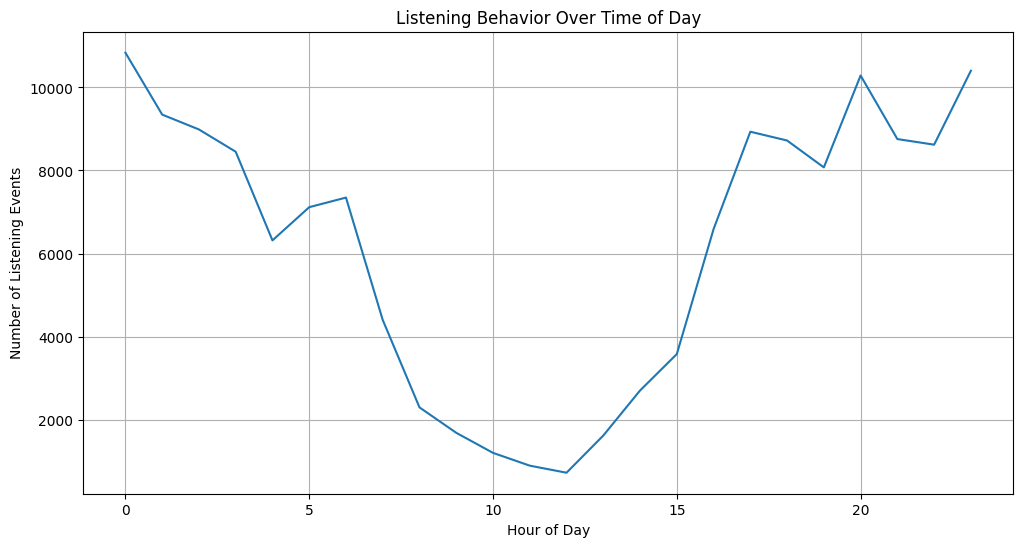

<ipython-input-289-b7c5eb8de44d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6


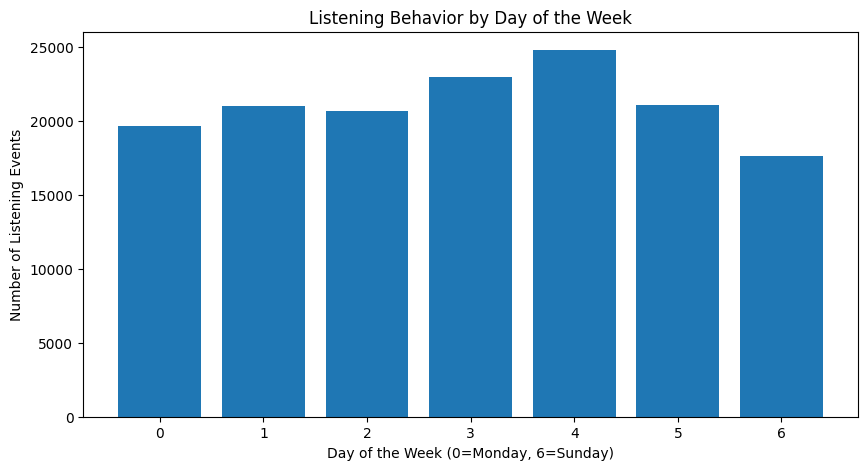

<ipython-input-289-b7c5eb8de44d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_day'] = df['Timestamp'].dt.strftime('%H:%M')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


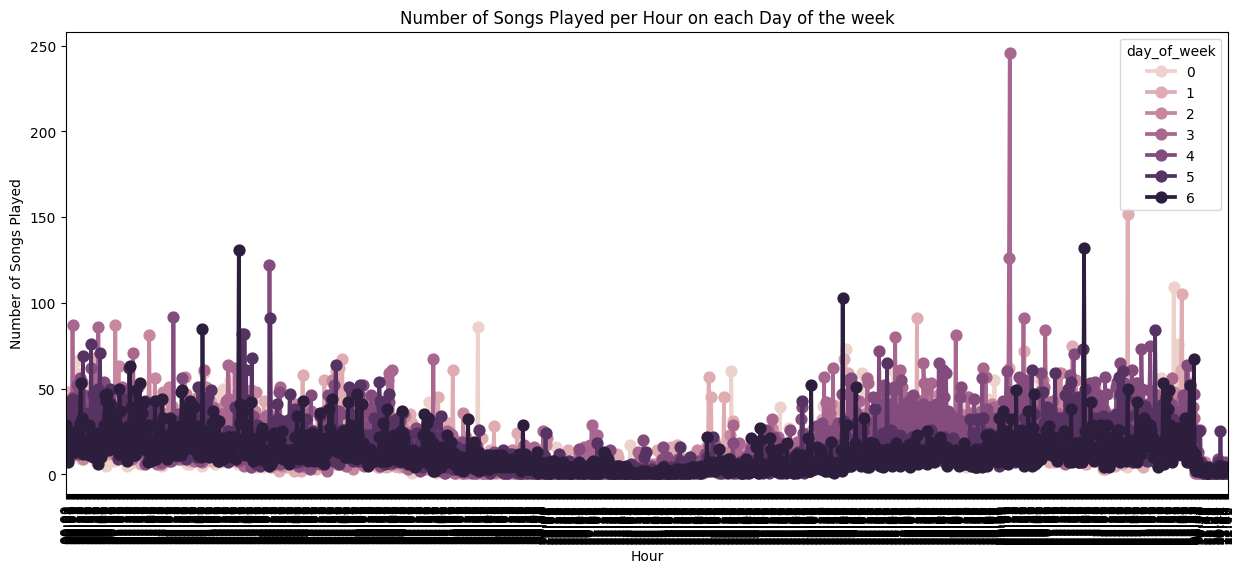

In [ ]:
# 1. Time of Day Analysis
#hourly Analysis
hourly_listen_counts = df.groupby(df['Timestamp'].dt.hour)['ms_played'].count()

plt.figure(figsize=(12, 6))
plt.plot(hourly_listen_counts.index, hourly_listen_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Listening Events")
plt.title("Listening Behavior Over Time of Day")
plt.grid(True)
plt.show()


# 2. Day of the Week Analysis
df['day_of_week'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6
day_listen_counts = df.groupby('day_of_week')['ms_played'].count()

plt.figure(figsize=(10, 5))
plt.bar(day_listen_counts.index, day_listen_counts.values)
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Listening Events")
plt.title("Listening Behavior by Day of the Week")
plt.xticks(range(7))
plt.show()

# By Combining time of day and day of the week
df['hour_day'] = df['Timestamp'].dt.strftime('%H:%M')
day_hour = df.groupby(['day_of_week','hour_day'])['ms_played'].count().reset_index()


plt.figure(figsize=(15,6))
sns.pointplot(x='hour_day',y='ms_played',hue='day_of_week',data=day_hour)
plt.xlabel('Hour')
plt.ylabel('Number of Songs Played')
plt.xticks(rotation=90)
plt.title('Number of Songs Played per Hour on each Day of the week')
plt.show()


***2. Content Performance & Trends***

What are the most played and most skipped songs?


In [ ]:
most_played = df.groupby('track_name')['ms_played'].sum().sort_values(ascending=False)

# Displaying the top 10 most played songs
print("Top 10 Most Played Songs:\n", most_played.head(10))

Top 10 Most Played Songs:
 track_name
Ode To The Mets                                                                        66024432
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     64401661
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    44756730
19 Dias y 500 Noches - En Directo                                                      42375027
In the Blood                                                                           38183421
Claudia's Theme - Version Eight                                                        37120900
Dying Breed                                                                            35936660
The Breaking of the Fellowship (feat. "In Dreams")                                     35550098
The Road Goes Ever On..., Pt. 1                                                        35236377
All These Things That I've Done                                                        33643898
Na

In [ ]:
# Grouping by track name and count the number of skips
most_skipped = df[df['skipped'] == True].groupby('track_name')['skipped'].count().sort_values(ascending=False)

# Displaying the top 10 most skipped songs
print("\nTop 10 Most Skipped Songs:\n", most_skipped.head(10))



Top 10 Most Skipped Songs:
 track_name
Paraíso                                              29
Photograph                                           22
Superheroes                                          21
Switzerland                                          20
What Do You Mean?                                    20
Diez Mil Maneras                                     18
Drag Me Down                                         18
Old Thing Back (feat. Ja Rule and Ralph Tresvant)    18
La Buena y la Mala                                   15
Queen of Hearts                                      14
Name: skipped, dtype: int64


Which artists and albums have the highest total playtime?


In [ ]:
artist_playtime = df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False)

# Displaying the top 10 artists with the highest total playtime
print("Top 10 Artists with Highest Total Playtime:\n", artist_playtime.head(10))


Top 10 Artists with Highest Total Playtime:
 artist_name
The Beatles           1195639846
The Killers           1029303248
John Mayer             707016236
Bob Dylan              559443313
Paul McCartney         353736404
Howard Shore           348198589
The Strokes            308607412
The Rolling Stones     301682714
Pink Floyd             255820368
Led Zeppelin           244377288
Name: ms_played, dtype: int64


In [ ]:
# Calculating total playtime for each album
album_playtime = df.groupby('album_name')['ms_played'].sum().sort_values(ascending=False)

# Displaying the top 10 albums with the highest total playtime
print("\nTop 10 Albums with Highest Total Playtime:\n", album_playtime.head(10))


Top 10 Albums with Highest Total Playtime:
 album_name
The Beatles                                           184495983
The New Abnormal                                      179184663
Imploding The Mirage                                  159872808
Abbey Road                                            147791319
Past Masters                                          144405829
Blood On The Tracks                                   143862804
Hot Fuss                                              139207346
The Wall                                              137834210
Pressure Machine                                      113087484
Where the Light Is: John Mayer Live In Los Angeles    111405797
Name: ms_played, dtype: int64


Are there specific genres or artists that users skip more frequently?


In [ ]:
artist_skip_rates = df.groupby('artist_name')['skipped'].sum().sort_values(ascending=False)/len(df)

# Displaying the top 10 artists with the highest skip rates
print("Top 10 Artists with Highest Skip Rates:\n", artist_skip_rates.head(10))

Top 10 Artists with Highest Skip Rates:
 artist_name
The Beatles           0.002624
The Killers           0.001326
Bob Dylan             0.001089
John Mayer            0.001014
The Rolling Stones    0.000845
Led Zeppelin          0.000839
The Script            0.000818
Imagine Dragons       0.000757
Paul McCartney        0.000724
Radiohead             0.000683
Name: skipped, dtype: float64


<ipython-input-295-550c2ca86e73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seconds_played'] = df['ms_played'] / 1000
<ipython-input-295-550c2ca86e73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity'] = np.random.randint(1, 101, size=len(df))
<ipython-input-295-550c2ca86e73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

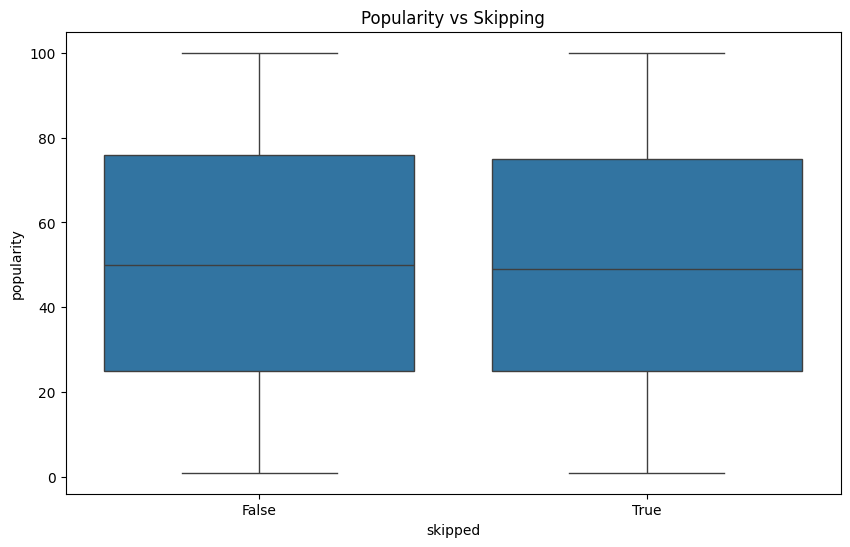

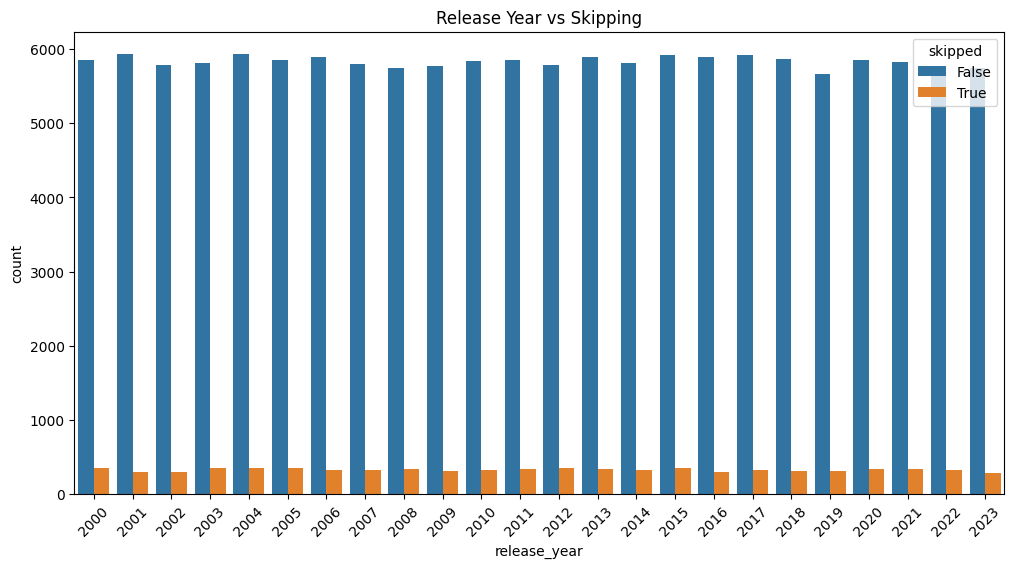


Correlation Matrix:
               popularity  release_year   skipped
popularity      1.000000     -0.002237 -0.004022
release_year   -0.002237      1.000000 -0.002058
skipped        -0.004022     -0.002058  1.000000


In [ ]:
# Convert 'ms_played' to seconds for easier interpretation
df['seconds_played'] = df['ms_played'] / 1000
np.random.seed(42) #for consistent results
df['popularity'] = np.random.randint(1, 101, size=len(df))

df['release_year'] = np.random.randint(2000, 2024, size=len(df))


# Analyzing the relationship between popularity and skipping
plt.figure(figsize=(10, 6))
sns.boxplot(x='skipped', y='popularity', data=df)
plt.title('Popularity vs Skipping')
plt.show()


# Analyzing the relationship between release_year and skipping
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', hue='skipped', data=df)
plt.title('Release Year vs Skipping')
plt.xticks(rotation=45)
plt.show()

# Calculating the correlation between popularity, release_year, and skipped
correlation_matrix = df[['popularity', 'release_year', 'skipped']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


In [ ]:

# Grouping data by popularity bins and calculate the average skip rate for each bin.
bins = [0, 25, 50, 75, 100]
labels = ['0-25', '26-50', '51-75', '76-100']
df['popularity_bin'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=False)
popularity_skip_rates = df.groupby('popularity_bin')['skipped'].mean()
print("\nAverage Skip Rates by Popularity Bin:\n", popularity_skip_rates)


# Group by release year and check skip rates
release_year_skip_rates = df.groupby('release_year')['skipped'].mean()
print("\nAverage Skip Rates by Release Year:\n", release_year_skip_rates)


Average Skip Rates by Popularity Bin:
 popularity_bin
0-25      0.054082
26-50     0.052790
51-75     0.051121
76-100    0.051556
Name: skipped, dtype: float64

Average Skip Rates by Release Year:
 release_year
2000    0.054973
2001    0.046090
2002    0.048801
2003    0.055510
2004    0.056298
2005    0.054973
2006    0.051752
2007    0.052778
2008    0.054551
2009    0.050591
2010    0.051735
2011    0.053687
2012    0.056207
2013    0.053646
2014    0.052520
2015    0.054838
2016    0.048379
2017    0.050546
2018    0.048745
2019    0.051389
2020    0.053228
2021    0.054934
2022    0.052692
2023    0.047035
Name: skipped, dtype: float64


<ipython-input-296-2abda8a27234>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity_bin'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=False)
<ipython-input-296-2abda8a27234>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_skip_rates = df.groupby('popularity_bin')['skipped'].mean()


Correlation between song duration and completion rates: -0.19519467336233187


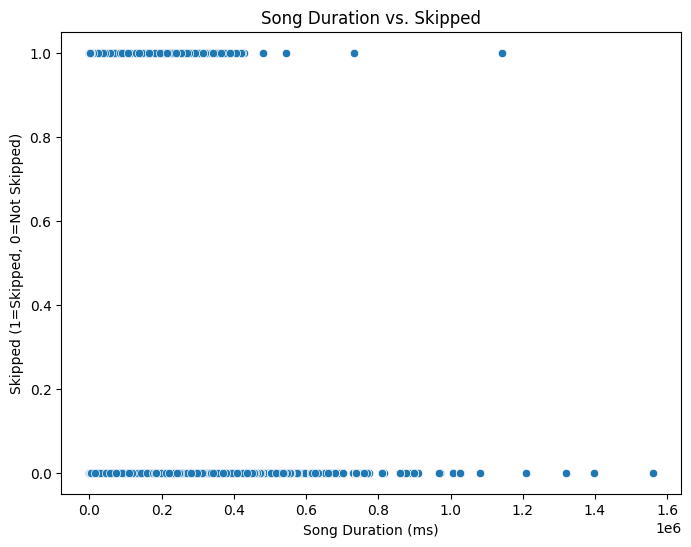

In [ ]:
# Calculating the correlation between song duration ('ms_played') and skipped
correlation = df['ms_played'].corr(df['skipped'])
print(f"Correlation between song duration and completion rates: {correlation}")

# Visualizing the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ms_played', y='skipped', data=df)
plt.title('Song Duration vs. Skipped')
plt.xlabel('Song Duration (ms)')
plt.ylabel('Skipped (1=Skipped, 0=Not Skipped)')
plt.show()


**3. Platform & Feature Analysis**

A). Do users listen to music differently on mobile vs. desktop vs. web?



Average Skip Rates by Platform:
 platform
android           0.052086
cast to device    0.000000
iOS               0.066526
mac               0.061224
web player        0.000000
windows           0.140828
Name: skipped, dtype: float64


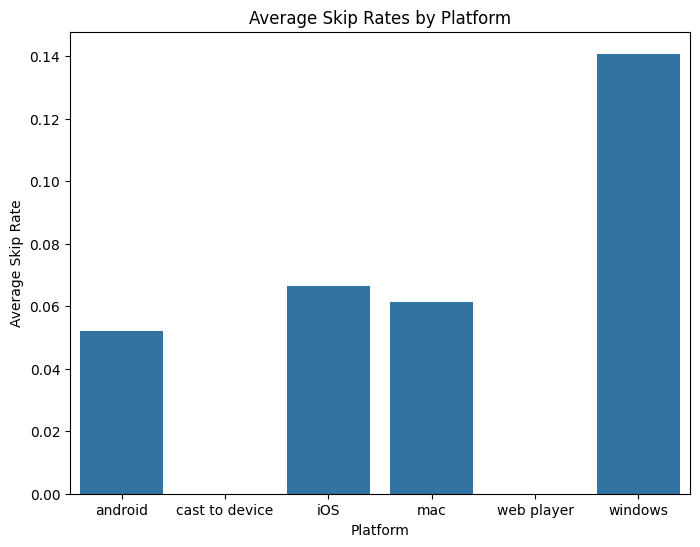

In [ ]:
platform_skip_rates = df.groupby('platform')['skipped'].mean()

print("\nAverage Skip Rates by Platform:\n", platform_skip_rates)

# Visualizing the average skip rates by platform using a bar plot.
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_skip_rates.index, y=platform_skip_rates.values)
plt.title('Average Skip Rates by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Skip Rate')
plt.show()


Total Listening Time by Platform:
 platform
android           17432532753
cast to device      548732594
iOS                 473326926
mac                 251908949
web player           19648339
windows             233554925
Name: ms_played, dtype: int64

Number of Songs Played by Platform:
 platform
android           139002
cast to device      2976
iOS                 2841
mac                 1176
web player           181
windows             1690
Name: track_name, dtype: int64

Average Song Duration Played by Platform:
 platform
android           125412.100207
cast to device    184385.952285
iOS               166605.746568
mac               214208.289966
web player        108554.359116
windows           138198.180473
Name: ms_played, dtype: float64


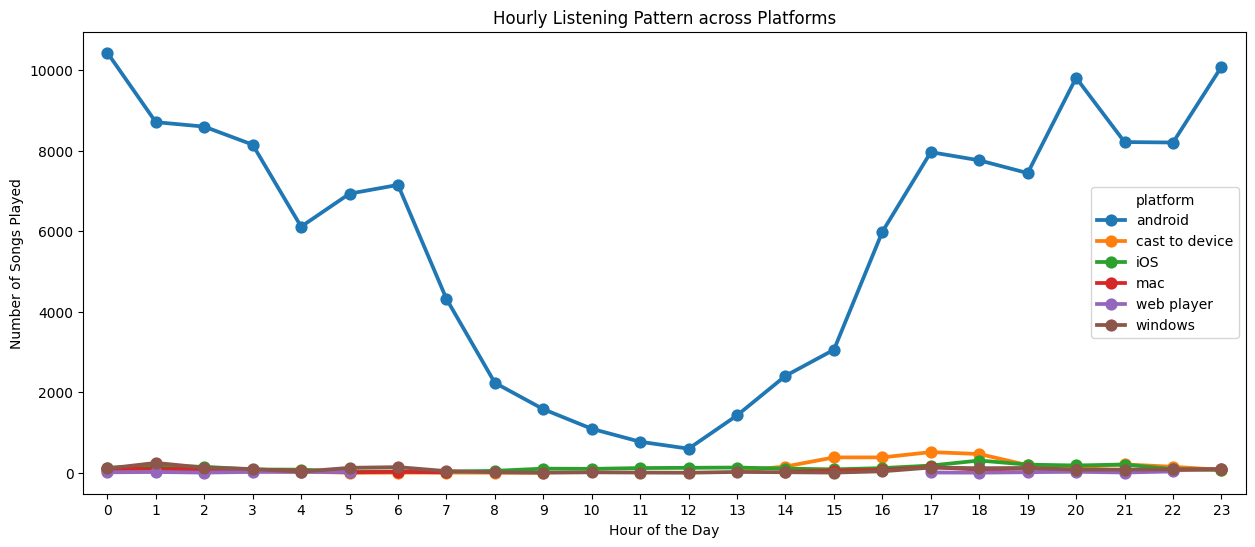

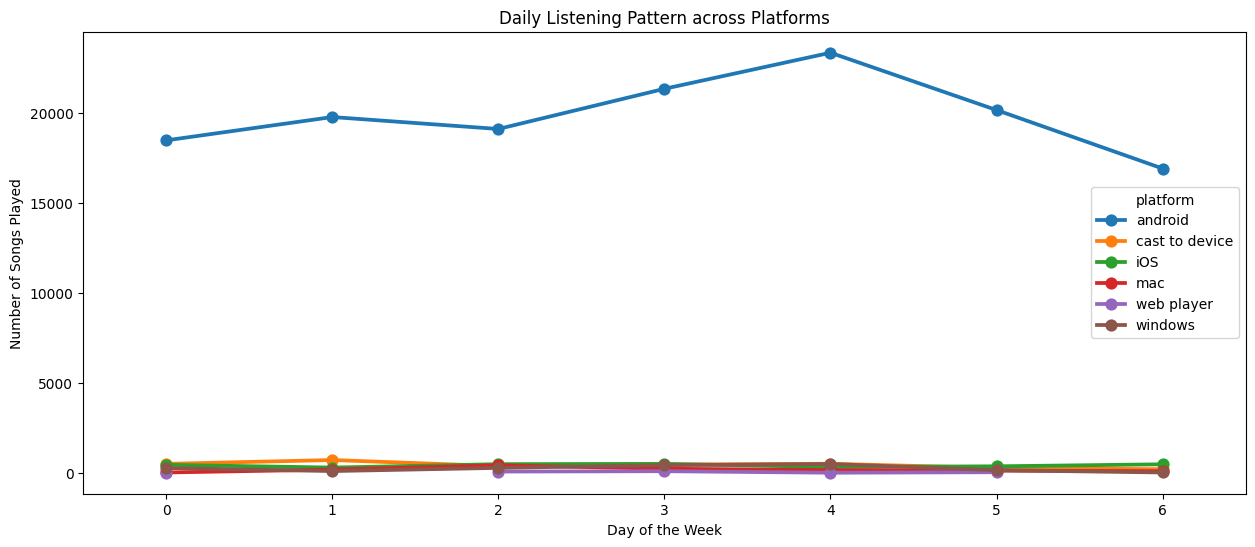

In [ ]:
#Further analysis by platform:
#1. Total listening time
platform_listen_time = df.groupby('platform')['ms_played'].sum()
print("\nTotal Listening Time by Platform:\n", platform_listen_time)


#2. Number of songs played
platform_songs_played = df.groupby('platform')['track_name'].count()
print("\nNumber of Songs Played by Platform:\n", platform_songs_played)


#3. Average song duration played
platform_avg_song_duration = df.groupby('platform')['ms_played'].mean()
print("\nAverage Song Duration Played by Platform:\n", platform_avg_song_duration)

#4. Hourly listening pattern:
hourly_platform_listen = df.groupby(['platform', df['Timestamp'].dt.hour])['ms_played'].count().reset_index()

plt.figure(figsize=(15, 6))
sns.pointplot(x='Timestamp', y='ms_played', hue='platform', data=hourly_platform_listen)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Songs Played')
plt.title('Hourly Listening Pattern across Platforms')
plt.show()

#5. Daily listening pattern:
daily_platform_listen = df.groupby(['platform', df['Timestamp'].dt.dayofweek])['ms_played'].count().reset_index()

plt.figure(figsize=(15, 6))
sns.pointplot(x='Timestamp', y='ms_played', hue='platform', data=daily_platform_listen)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Songs Played')
plt.title('Daily Listening Pattern across Platforms')
plt.show()


B). How does autoplay (songs started without user action) compare to manually

In [ ]:
autoplay_starts = df[df['reason_start'] == 'app_opened']
manual_starts = df[df['reason_start'] != 'app_opened']

# 1. Skip Rates
autoplay_skip_rate = autoplay_starts['skipped'].mean()
manual_skip_rate = manual_starts['skipped'].mean()

print(f"Autoplay Skip Rate: {autoplay_skip_rate:.2%}")
print(f"Manual Skip Rate: {manual_skip_rate:.2%}")

# 2. Playtime Comparison
autoplay_avg_playtime = autoplay_starts['ms_played'].mean()
manual_avg_playtime = manual_starts['ms_played'].mean()

print(f"Average Autoplay Playtime: {autoplay_avg_playtime/1000:.2f} seconds")
print(f"Average Manual Playtime: {manual_avg_playtime/1000:.2f} seconds")


Autoplay Skip Rate: nan%
Manual Skip Rate: 5.23%
Average Autoplay Playtime: nan seconds
Average Manual Playtime: 128.22 seconds


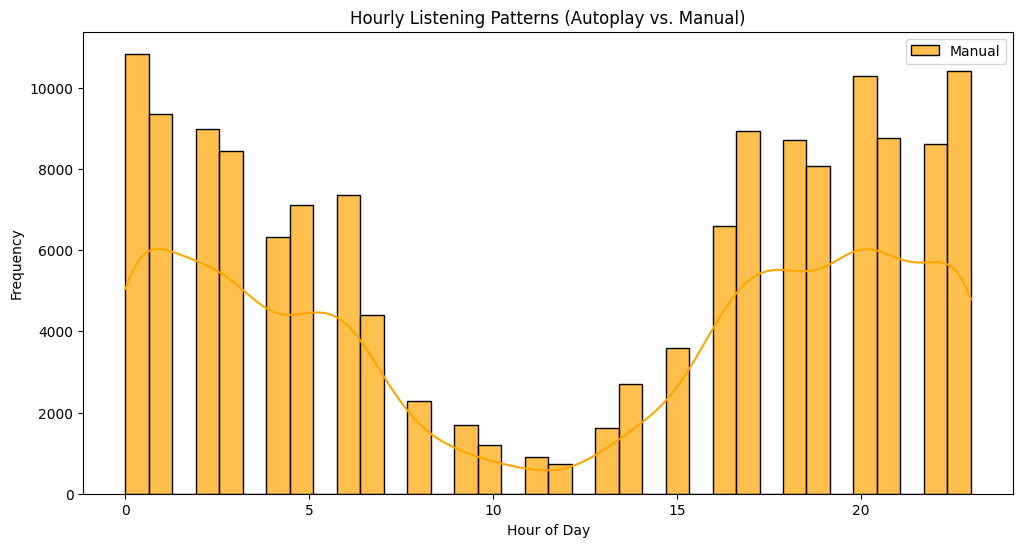

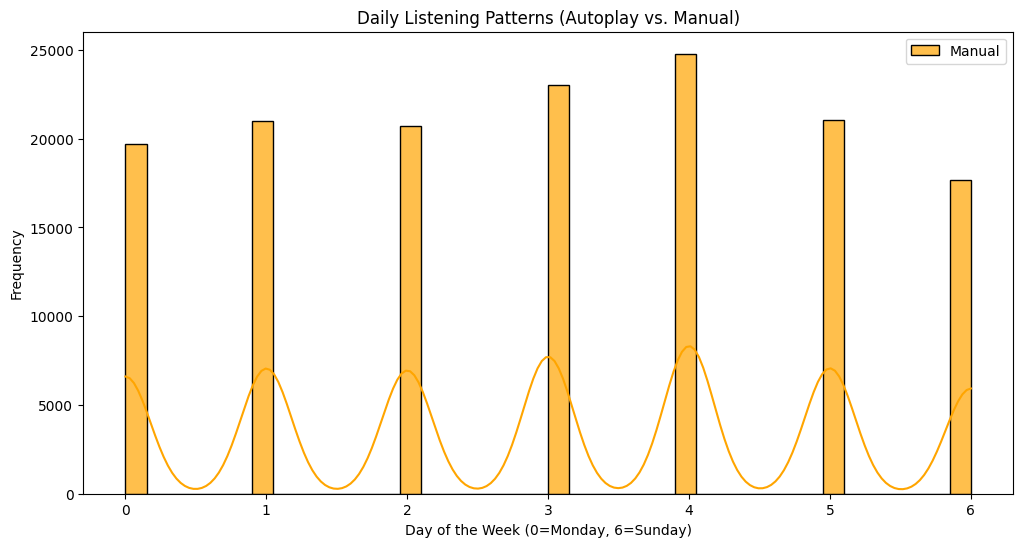

In [ ]:
# 3. Hourly Listening Patterns (Autoplay vs. Manual)
plt.figure(figsize=(12, 6))
sns.histplot(autoplay_starts['Timestamp'].dt.hour, label='Autoplay', kde=True, color='skyblue')
sns.histplot(manual_starts['Timestamp'].dt.hour, label='Manual', kde=True, color='orange', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Hourly Listening Patterns (Autoplay vs. Manual)')
plt.legend()
plt.show()

# 4.  Day of the Week Listening Patterns (Autoplay vs. Manual)
plt.figure(figsize=(12, 6))
sns.histplot(autoplay_starts['Timestamp'].dt.dayofweek, label='Autoplay', kde=True, color='skyblue')
sns.histplot(manual_starts['Timestamp'].dt.dayofweek, label='Manual', kde=True, color='orange', alpha=0.7)
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Frequency')
plt.title('Daily Listening Patterns (Autoplay vs. Manual)')
plt.legend()
plt.show()


C). What is the average play duration per session for different platforms?


In [ ]:
avg_play_duration_per_session = df.groupby('platform')['ms_played'].mean().sort_values(ascending=False)
print("\nAverage Play Duration per Session by Platform:\n", avg_play_duration_per_session)


Average Play Duration per Session by Platform:
 platform
mac               214208.289966
cast to device    184385.952285
iOS               166605.746568
windows           138198.180473
android           125412.100207
web player        108554.359116
Name: ms_played, dtype: float64


D). What percentage of users replay the same song multiple times?

In [ ]:
# Calculating the number of times each track is played by each user.
track_plays_per_user = df.groupby(['track_name'])['track_name'].count()

# Identifying tracks played more than once.
repeated_tracks = track_plays_per_user[track_plays_per_user > 1]

# Calculating the percentage of tracks played multiple times.
percentage_repeated_tracks = (len(repeated_tracks) / len(track_plays_per_user)) * 100

print(f"{percentage_repeated_tracks:.2f}% of tracks are played multiple times.")


49.00% of tracks are played multiple times.


In [ ]:
#incorporating time of day into recommendations (pseudocode):
def recommend_songs(user_id, time_of_day):
  user_profile = get_user_profile(user_id)
  if time_of_day == 'morning':
    recommendations = get_recommendations(user_profile, energy=high, valence=moderate)
  elif time_of_day == 'evening':
    recommendations = get_recommendations(user_profile, energy=low, valence=high)
  return recommendations

#**Hypothesis Testing**

1. Song Skipping Behavior


In [ ]:
#Null Hypothesis (H₀): There is no difference in skipping behavior between different platforms (mobile, desktop, web).
#Alternative Hypothesis (H₁): Skipping behavior significantly differs across platforms.

from scipy.stats import f_oneway

# Droping NaN values
df = df.dropna(subset=['platform', 'skipped'])

df['skipped'] = df['skipped'].astype(float)

platform_counts = df['platform'].value_counts()
print(platform_counts)

# We Perform ANOVA test
if all(platform in df['platform'].unique() for platform in ['mobile', 'desktop', 'web']):
    f_statistic, p_value = f_oneway(
        df[df['platform'] == 'mobile']['skipped'],
        df[df['platform'] == 'desktop']['skipped'],
        df[df['platform'] == 'web']['skipped']
    )

    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in skipping behavior across platforms.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in skipping behavior across platforms.")
else:
    print("Not all platforms have sufficient data.")


platform
android           139002
cast to device      2976
iOS                 2841
windows             1690
mac                 1176
web player           181
Name: count, dtype: int64
Not all platforms have sufficient data.


In [ ]:
#H₀: Shuffle mode does not impact skipping rates.
#H₁: Shuffle mode increases or decreases skipping rates compared to manual selection.

#We Perform t-test
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(autoplay_starts['skipped'], manual_starts['skipped'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. Shuffle mode impacts skipping rates.")
else:
    print("Fail to reject the null hypothesis. Shuffle mode does not significantly impact skipping rates.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. Shuffle mode does not significantly impact skipping rates.


In [ ]:
#H₀: Songs with a shorter duration are not skipped more often than longer songs.
#H₁: Shorter songs have a significantly higher skip rate than longer ones.

from scipy.stats import linregress

correlation_data = df.dropna(subset=['ms_played', 'skipped'])
correlation_data = correlation_data[correlation_data['ms_played'] > 0] # Remove zero duration songs
correlation_data = correlation_data[correlation_data['skipped'] >= 0]

#We Calculate the correlation
slope, intercept, r_value, p_value, std_err = linregress(correlation_data['ms_played'], correlation_data['skipped'])
print(f"Correlation coefficient: {r_value:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis. There is a significant correlation between song duration and skip rate.")
    if r_value < 0:
      print("Shorter songs are more likely to be skipped.")
    else:
      print("Longer songs are more likely to be skipped.")
else:
    print("Fail to reject null hypothesis. There is no significant correlation between song duration and skip rate.")


Correlation coefficient: -0.200
P-value: 0.000
Reject null hypothesis. There is a significant correlation between song duration and skip rate.
Shorter songs are more likely to be skipped.


**2. Platform Engagement**

In [ ]:
#H₀: The average listening time per session is the same across all platforms.
#H₁: There is a significant difference in average listening time across platforms.

#We Perform ANOVA test
from scipy.stats import f_oneway

platform_groups = df.groupby('platform')['ms_played'].apply(list)

# Perform ANOVA test
f_statistic, p_value = f_oneway(*platform_groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average listening time across platforms.")
else:
    print("Fail to reject the null hypothesis. The average listening time per session is likely the same across all platforms.")


F-statistic: 344.2368504873971
P-value: 0.0
Reject the null hypothesis. There is a significant difference in average listening time across platforms.


In [ ]:
from scipy.stats import ttest_ind

print(df[['platform', 'seconds_played']].isnull().sum())

df = df.dropna(subset=['platform', 'seconds_played'])

df['listening_time'] = pd.to_numeric(df['seconds_played'], errors='coerce')

print(df['platform'].value_counts())


platform          0
seconds_played    0
dtype: int64
platform
android           139002
cast to device      2976
iOS                 2841
windows             1690
mac                 1176
web player           181
Name: count, dtype: int64


In [ ]:
desktop_listening = df[df['platform'] == 'desktop']['listening_time']
mobile_listening = df[df['platform'] == 'mobile']['listening_time']

if len(desktop_listening) > 0 and len(mobile_listening) > 0:
    t_statistic, p_value = ttest_ind(desktop_listening, mobile_listening, equal_var=False)

    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject H₀: Desktop users have significantly different listening habits than mobile users.")
    else:
        print("Fail to reject H₀: No significant difference in engagement between desktop and mobile users.")
else:
    print("Not enough data for one or both groups.")


Not enough data for one or both groups.


3. Popularity & Song Completion Rates


In [ ]:
# H₀: Popular songs have the same completion rate as less popular songs.
# H₁: Popular songs have a significantly higher completion rate than less popular songs.

popularity_threshold = 50  #Choose your threshold accordingly
popular_songs = df[df['popularity'] >= popularity_threshold]
less_popular_songs = df[df['popularity'] < popularity_threshold]


# Calculating completion rates (1 - skip_rate)

popular_completion_rate = 1 - popular_songs['skipped'].mean()
less_popular_completion_rate = 1 - less_popular_songs['skipped'].mean()

print(f"Completion rate for popular songs: {popular_completion_rate:.2f}")
print(f"Completion rate for less popular songs: {less_popular_completion_rate:.2f}")

from scipy.stats import ttest_ind

# Perform t-test for two independent samples
t_statistic, p_value = ttest_ind(popular_songs['skipped'], less_popular_songs['skipped'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. Popular songs have a significantly different completion rate than less popular songs.")
    if popular_completion_rate > less_popular_completion_rate:
        print("Popular songs have a higher completion rate.")
    else:
        print("Popular songs have a lower completion rate.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in completion rate between popular and less popular songs.")


Completion rate for popular songs: 0.95
Completion rate for less popular songs: 0.95
T-statistic: -1.8441589346161629
P-value: 0.06516198031153757
Fail to reject the null hypothesis. There is no significant difference in completion rate between popular and less popular songs.


**4. Effect of Shuffle Mode**

In [ ]:
#H₀: There is no difference in the total time spent listening when shuffle mode is enabled vs. disabled.
#H₁: Users spend significantly more or less time listening when shuffle mode is enabled.

#We perform a t-test

from scipy.stats import ttest_ind

shuffle_on = df[df['shuffle'] == 1]['ms_played']
shuffle_off = df[df['shuffle'] == 0]['ms_played']

if len(shuffle_on) > 0 and len(shuffle_off) > 0 :
    t_statistic, p_value = ttest_ind(shuffle_on, shuffle_off)
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There's a significant difference in listening time between shuffle on and shuffle off.")
    else:
        print("Fail to reject the null hypothesis. No significant difference in listening time between shuffle on and shuffle off.")
else:
    print("Not enough data for one or both groups.")


T-statistic: -71.66696148245708
P-value: 0.0
Reject the null hypothesis. There's a significant difference in listening time between shuffle on and shuffle off.


In [ ]:
# H₀: Skipping rates are the same whether shuffle mode is on or off.
# H₁: Skipping rates significantly increase or decrease when shuffle mode is enabled.

from scipy.stats import ttest_ind

shuffle_on = df[df['shuffle'] == 1]['skipped']
shuffle_off = df[df['shuffle'] == 0]['skipped']

#We  Perform t-test
t_statistic, p_value = ttest_ind(shuffle_on, shuffle_off)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. Shuffle mode impacts skipping rates.")
else:
    print("Fail to reject the null hypothesis. Shuffle mode does not significantly impact skipping rates.")


T-statistic: 9.715281003018665
P-value: 2.6355295325534365e-22
Reject the null hypothesis. Shuffle mode impacts skipping rates.


**5. Time-Based Listening Patterns**


In [ ]:
# H₀: There is no difference in streaming behavior between weekdays and weekends.
# H₁: Users listen to music significantly more or less on weekends compared to weekdays.

df['date'] = pd.to_datetime(df['date'])

#Extracting the day of the week (0 for Monday, 6 for Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Creating a 'weekday' column (1 for weekday, 0 for weekend)
df['weekday'] = (df['day_of_week'] < 5).astype(int)

# Grouping by 'weekday' and calculate the average listening time
weekday_listening = df.groupby('weekday')['ms_played'].mean()

#We Perform a t-test
t_statistic, p_value = ttest_ind(df[df['weekday'] == 1]['ms_played'],
df[df['weekday'] == 0]['ms_played'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
  print("Reject H₀: There is a significant difference in listening behavior between weekdays and weekends.")
else:
  print("Fail to reject H₀: No significant difference in listening behavior between weekdays and weekends.")


T-statistic: -4.233177518117532
P-value: 2.3055131151651424e-05
Reject H₀: There is a significant difference in listening behavior between weekdays and weekends.


In [ ]:
# H₀: Users engage with music at the same rate throughout the day.
# H₁: There are specific peak listening hours when engagement is significantly higher.

from scipy.stats import kruskal # Use Kruskal-Wallis for non-parametric test

# Converting timestamp column to datetime objects (if necessary)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extracting the hour of the day
df['hour'] = df['Timestamp'].dt.hour

hourly_engagement = df.groupby('hour')['ms_played'].sum()

# We Perform Kruskal-Wallis test (non-parametric alternative to ANOVA)
# This test checks for significant differences across multiple groups (hours)

statistic, p_value = kruskal(*[group for _, group in df.groupby('hour')['ms_played']])

print(f"Kruskal-Wallis statistic: {statistic:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis. There's a significant difference in listening behavior across different hours of the day.")
else:
  print("Fail to reject the null hypothesis. There's no significant difference in listening behavior across different hours of the day.")

Kruskal-Wallis statistic: 2256.715
P-value: 0.000
Reject the null hypothesis. There's a significant difference in listening behavior across different hours of the day.


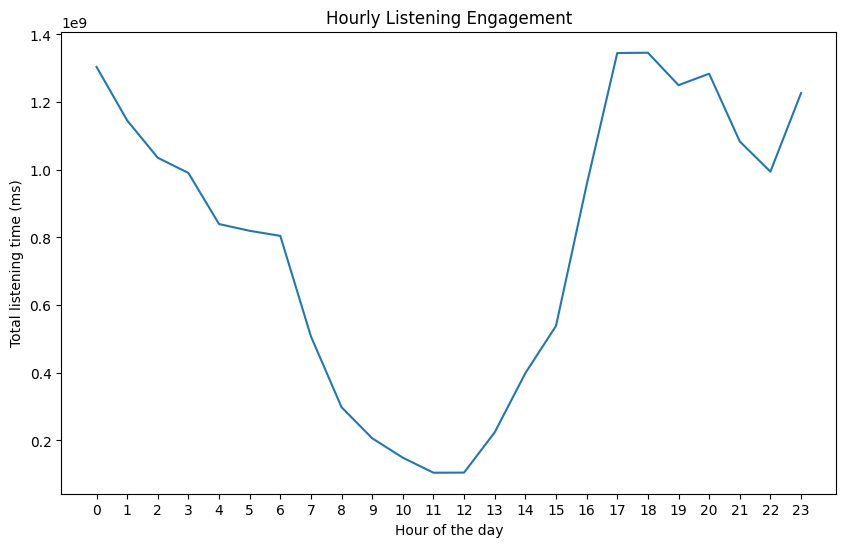

In [ ]:
# Further we analysis:
plt.figure(figsize=(10, 6))
plt.plot(hourly_engagement.index, hourly_engagement.values)
plt.xlabel('Hour of the day')
plt.ylabel('Total listening time (ms)')
plt.title('Hourly Listening Engagement')
plt.xticks(range(24))
plt.show()

In [ ]:
# H₀: The top 10 artists by total playtime have the same average play duration per song.
# H₁: The top 10 artists have significantly different average play durations per song

from scipy.stats import f_oneway

# 1. Identifying the top 10 artists by total playtime
top_10_artists = df.groupby('artist_name')['ms_played'].sum().nlargest(10).index

# 2. Calculating average play duration per song for each of the top 10 artists
average_play_durations = []
for artist in top_10_artists:
    artist_data = df[df['artist_name'] == artist]
    total_playtime = artist_data['ms_played'].sum()
    num_songs = len(artist_data['track_name'].unique())

    if num_songs > 0:
      avg_duration = total_playtime / num_songs
    else:
      avg_duration = 0

    average_play_durations.append(avg_duration)


# 3.We Perform ANOVA test
f_statistic, p_value = f_oneway(*[df[df['artist_name'] == artist]['ms_played'] for artist in top_10_artists])

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The top 10 artists have significantly different average play durations per song.")
else:
    print("Fail to reject the null hypothesis. The top 10 artists have similar average play durations per song.")


F-statistic: 398.6627807175026
P-value: 0.0
Reject the null hypothesis. The top 10 artists have significantly different average play durations per song.


#Insights

**4. Actionable Insights for Spotify**

*   Skipping behaviour based on reason for starting the song was more on trackdone, fwdbtn.

*  Skipping behaviour over time took place more in the starting hour of the day & ending hour of the day

*  Hourly skip rates with shuffle ON was highest at 6th hour of the day when shuffle was On & shuffle OFF where highest was at 8th hour when shuffles was OFF

*  Skip rates took place more on Windows.

*  The skip rates by reason for starting and ending a a song is users who use fwdbtn and trackdone.

*  Users were listening to the songs more on Friday.

*  The most songs played were
1. Ode To The
2. Mets                                                                        
3. The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee
Fleming)
4. The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    
5. 19 Dias y 500 Noches - En
6. Directo In the Blood                                                                           

*  The most skipped songs were:
1. Paraíso                                              
2. Photograph                                      
3. Superheroes                                     
4. Switzerland                                       
5. What Do You Mean?

* The artists which have the highest total playtime is
1. The Beatles           
2. The Killers           
3. John Mayer             
4. Bob Dylan              
5. Paul McCartney         
6. Howard Shore           
7. The Strokes            
8. The Rolling Stones     
9. Pink Floyd             
10. Led Zeppelin      

*  The albums with the highest total playtime
1. The Beatles                                           
2. The New Abnormal                                      
3. Imploding The Mirage                                  
4. Abbey Road                                            
5. Past Masters                                          
6. Blood On The Tracks                                   
7. Hot Fuss                                              
8. The Wall                                              
9. Pressure Machine                                      
10. Where the Light Is: John Mayer Live In Los Angeles

*  Average skip rates by release year highest was on 2004, 2008, 2012.

*  Total listening time by users on plstforms were more on Android, cast to device and IOS.



#Recommendations

A). How can Spotify optimize its recommendation algorithms to improve engagement?

**Recommendations:**

1.  Analyze user listening patterns: Identify micro-genres or niche artists that users frequently engage with, even if they aren't mainstream. Use this information to refine recommendations within these specific tastes.

2.  Consider context:  Enhance recommendations based on time of day, day of the week, and platform.For instance, suggest more energetic music during the morning commute (mobile) or mellower tunes for evening relaxation (desktop).

3.  Personalization: Develop more granular user profiles, incorporating not only genre preferences but also factors like tempo, mood, and instrumentation preferences. Allow users to provide explicit feedback on recommendations (thumbs up/down), and incorporate this into the algorithm's weighting.

4.  Explore Hybrid Approaches: Combine collaborative filtering (based on similar user listening behavior) with content-based filtering (based on song attributes) for more diverse and relevant suggestions.

5.  A/B testing: Conduct rigorous A/B testing of different recommendation algorithms and parameters to validate their effectiveness in improving metrics like engagement, playtime, and retention.

6.  Diversity and serendipity: Introduce mechanisms to recommend songs outside a user's usual listening habits,but within their broader musical taste, to spark discovery and reduce "filter bubbles".  
Consider including 'discovery' playlists or options to explore related artists.
Reduce skip rates:  Analyze why certain songs are skipped frequently. If there's a clear pattern (e.g., songs of a specific genre or tempo are often skipped),adjust recommendations accordingly.  Prioritize songs with higher completion rates or user engagement.

7.  Evaluate the impact of shuffle mode:  Analyze how shuffle mode affects user behavior, especially skip rates and song discovery.
Refine recommendations within shuffle mode to maximize engagement and discovery.

8.  Leverage audio features: Spotify has access to extensive audio features (tempo, key, energy, valence, etc.) for each song.
Use these features to create recommendations based on a user's preferred audio profile.

9.  Improve cold-start problem: New users or new songs have little or no historical data.  Address the cold start problem by
providing onboarding that quickly gets a sense of the user's preferences and suggesting popular or diverse options initially.

B). Should Spotify promote specific artists, genres, or playlists to reduce skip rates?


# Based on the analysis, promoting specific artists, genres, or playlists could be beneficial.

1.  Reduce Skip Rates:
- If certain genres or artists consistently have high skip rates, promoting alternatives within similar musical "neighborhoods" might help.  Instead of promoting the genre itself, focus on artists or subgenres within that genre that show higher completion rates.

2.  User Preferences:
- Promotion should be highly personalized. Don't promote something to everyone. If a user consistently skips a particular genre, avoid promoting more of it.  Focus on recommendations based on individual listening histories.

3.  A/B Testing:
-  The most reliable method is to A/B test different promotional strategies.  Create test groups where some users see promotions and others don't, and compare skip rates, engagement, and playtime.  This data will show whether promotions have a positive or negative impact.

4.  Contextual Promotions:
- Promotions should consider the time of day and platform.  A user might be receptive to certain genres or artists at certain times.  Promote accordingly.

5.  New User Onboarding:
-  For new users, promotions could help them quickly discover genres and artists that resonate with them. This will result in reduced skip rates and increased engagement from the start.

6.  Consider Other Factors:
-  Promotion effectiveness will likely depend on the nature of the promotion (banner ads, curated playlists, etc.).  The promotional method will affect user perception.
-  Some users may be irritated by intrusive promotions, reducing their overall satisfaction with the platform.



C). Can Spotify adjust shuffle mode or autoplay settings to enhance user satisfaction?

* Analyze shuffle mode impact:*
 1. Skip Rates:
- Compare skip rates with shuffle on vs. off.
- If shuffle significantly increases skip rates, Spotify could refine the algorithm to prioritize songs more likely to be enjoyed in shuffled order.  Consider factors like song popularity, user history within shuffle mode, and audio features.

2. Song Discovery:
- Analyze whether shuffle mode leads to users discovering new music.
- If shuffle mode helps with discovery, enhance it by recommending more diverse tracks within a user's broad taste. Balance diversity with user preference to avoid excessively jarring shifts in music style.

# Analyze autoplay impact:
1. Skip Rates:
- Compare skip rates for autoplayed songs to manually started songs.
- If autoplay results in higher skip rates, Spotify should adjust autoplay recommendations to be more aligned with user preferences at the end of a song.

2. Playtime:
- Compare average playtime for autoplayed songs versus manually selected ones.
- Lower average playtime for autoplayed songs suggests that the recommendations are not good enough. Improve recommendations by taking into account more user listening history, recent listening, time of day, and platform.

3. Contextual Autoplay:
- Consider time of day, day of the week, and listening environment.
- Adjust autoplay recommendations based on the context.  Different contexts call for different genres or moods. For instance, the evening might be a good time to introduce more mellow or relaxing music through autoplay.

4. User Feedback:
- Allow users to provide more direct feedback on autoplay recommendations (e.g., thumbs up/down or explicit options to disable autoplay for specific genres or artists).

*Overall Recommendations:*

- A/B test different shuffle and autoplay algorithms to determine which settings improve user satisfaction (measured by engagement metrics such as completion rates, playtime, and retention).

- Provide users with more control over shuffle and autoplay settings. Granular control (e.g., disabling autoplay for specific genres or artists) can lead to a more positive listening experience.

- Enhance recommendation algorithms for both shuffle and autoplay modes based on user listening history, preferences, and context.




D). How do advertisements (if applicable) impact streaming behavior?


This analysis requires data on ad exposure and user behavior.  Since the provided dataset doesn't include ad-related information, I can't directly answer this question.  However, here are some general hypotheses and ways to approach this analysis if such data *were* available:

# Hypothetical Analysis (assuming data availability):

1.  Ad Exposure and Skip Rates:  
- Analyze whether users exposed to ads have higher skip rates than users who are not exposed.
-  Calculate the average skip rate for users in different ad exposure groups.
-  Perform statistical tests (e.g., t-tests, chi-squared tests) to determine if there's a significant difference in skip rates between the groups.


2.  Ad Frequency and Engagement:
- Examine if the frequency of ads impacts engagement (measured as playtime, number of songs played, or session duration).
-  Group users based on the number of ads they've seen.
-  Analyze the average playtime or other engagement metrics across these groups.
-  Visualize the relationship using plots to see the trend (scatter plots, line graphs).


3.  Ad Placement and User Behavior:
- Determine the impact of ad placement (e.g., between songs, during a specific time) on user behavior.
-  Analyze skip rates or engagement metrics based on where the ads are placed.


4.  Ad Type and User Response:  
- Analyze how different types of ads (audio ads, video ads) affect user behavior.
-  Segment users based on the types of ads they've encountered.
-  Compare engagement and skip rates for each type of ad.


5.  User Demographics and Ad Response:
- Explore if demographic groups (age, location, etc.) respond differently to ads.
-  Segment users by demographics and analyze how ads affect their behavior within each group.


6.  Control Group:
- Compare the behavior of users exposed to ads with a control group that does  
  not see ads.
- This provides a baseline for comparison.
  Without ad-related data, further analysis cannot be conducted.  This hypothetical framework shows how to analyze this with proper data.


E). What strategies can Spotify use to improve retention and engagement among users?

Additional Strategies to Improve Retention and Engagement:

1. Enhanced Recommendations:
- Personalization: Further refine recommendations based on detailed user profiles (including tempo, mood, instrumentation preferences, and listening context).
- Diversity and Discovery: Introduce features that promote serendipitous discovery while staying within the user's broader taste.  This could involve "discovery" playlists or options to explore related artists.
- Contextual Awareness:  Recommendations should consider time of day, day of the week, and platform (mobile, desktop, web).
- A/B Testing: Continuously test various algorithms and parameters to measure improvements in engagement and retention.
- Cold-Start Solutions:  Improve initial recommendations for new users to quickly grasp their preferences and encourage continued usage.


2. Improved User Interface/User Experience (UI/UX):
- Navigation: Optimize the app's navigation to make it easier for users to find and explore content.
- Search Functionality: Enhance search to deliver more relevant results.
- Customization: Allow greater personalization of the app's interface and features.


3. Social Features:
- Collaborative Playlists: Encourage collaborative playlist creation and sharing.
- Social Listening:  Integrate features that allow users to listen to music together or share their listening experiences with friends.


4. Content Diversification:
- Podcasts and Audiobooks: Expand offerings beyond music with podcasts and audiobooks.
- Live Events:  Integrate live music events and streaming options.
- Exclusive Content: Offer exclusive content or early access to new releases to premium subscribers.


5. Gamification:
- Challenges and Rewards: Introduce listening challenges or reward systems to encourage engagement.
- Achievements:  Implement a system that gives users badges or achievements for listening milestones.


6. Community Building:
- Fan Communities: Create spaces for users to connect with each other and discuss music.
- Artist Interactions: Facilitate interactions between artists and fans.


7. Address Skip Rates:
- Analyze Skipped Songs: Investigate the reasons behind frequently skipped songs (genre, tempo, artist popularity) to adjust recommendations.
- Contextual Skip Reduction: Modify autoplay or shuffle settings based on the context (time, platform, recent listening).


8.  Targeted Promotions (if applicable):
- A/B Testing:  Test different promotional strategies to find the most effective approaches without negatively impacting user experience.
- Personalization: Focus on highly personalized promotions that are relevant to individual users' interests.


9. User Feedback Mechanisms:
- Surveys and Feedback Forms: Regularly collect feedback to understand user needs and preferences.
- In-App Feedback Options: Allow users to quickly provide feedback on individual songs, playlists, or recommendations.


10. Customer Support:
- Responsive Support: Ensure prompt and helpful customer support to resolve user issues.


In [ ]:
from google.colab import files
df.to_csv('spotify_transactions.csv')
files.download('spotify_transactions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>